In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
    array, cumsum, dot, transpose, diagonal, floor


In [2]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")
outdir = './R2_R3_compare/'


In [4]:
B_rg_file = './R2_R3_BADGE/rg.dat'
E2_rg_file = './R2_R3_EPI-002/rg.dat'
IE_rg_file = './R2_R3_Iodo-EPI-002/rg.dat'
E7_rg_file = './R2_R3_EPI-7170/rg.dat'
CAM1_rg = np.loadtxt(B_rg_file)
E2_rg = np.loadtxt(E2_rg_file)
IE_rg = np.loadtxt(IE_rg_file)
E7_rg = np.loadtxt(E7_rg_file)

Bdir = './R2_R3_BADGE/'
E2dir = './R2_R3_EPI-002/'
IEdir = './R2_R3_Iodo-EPI-002/'
E7dir = './R2_R3_EPI-7170/'
apodir = './R2_R3_APO/'


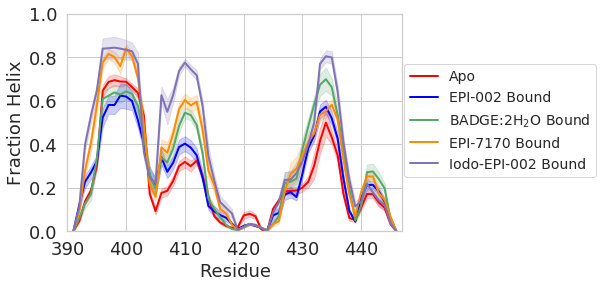

In [5]:
sns.set(style='whitegrid')

file = 'Hprop.err.dat'
boundfile = 'Hprop.bound.err.dat'
Helix_apo = np.loadtxt(apodir+file)
Helix_E2_bound = np.loadtxt(E2dir+boundfile)
Helix_B_bound = np.loadtxt(Bdir+boundfile)
Helix_E7_bound = np.loadtxt(E7dir+boundfile)
Helix_IE_bound = np.loadtxt(IEdir+boundfile)

Apo_u = Helix_apo[:, 1]+Helix_apo[:, 2]
Apo_l = Helix_apo[:, 1]-Helix_apo[:, 2]
E2_u = Helix_E2_bound[:, 1]+Helix_E2_bound[:, 2]
E2_l = Helix_E2_bound[:, 1]-Helix_E2_bound[:, 2]
B_u = Helix_B_bound[:, 1]+Helix_B_bound[:, 2]
B_l = Helix_B_bound[:, 1]-Helix_B_bound[:, 2]
E7_u = Helix_E7_bound[:, 1]+Helix_E7_bound[:, 2]
E7_l = Helix_E7_bound[:, 1]-Helix_E7_bound[:, 2]
IE_u = Helix_IE_bound[:, 1]+Helix_IE_bound[:, 2]
IE_l = Helix_IE_bound[:, 1]-Helix_IE_bound[:, 2]


sns.lineplot(x=Helix_apo[:, 0], y=Helix_apo[:, 1],
             color='red', label='Apo', linewidth=2)
sns.lineplot(x=Helix_E2_bound[:, 0], y=Helix_E2_bound[:, 1],
             color='blue', label='EPI-002 Bound', linewidth=2)
sns.lineplot(x=Helix_B_bound[:, 0], y=Helix_B_bound[:, 1],
             color='C2', label='BADGE:2H$_2$O Bound', linewidth=2)
sns.lineplot(x=Helix_E7_bound[:, 0], y=Helix_E7_bound[:, 1],
             color='darkorange', label='EPI-7170 Bound', linewidth=2)
sns.lineplot(x=Helix_IE_bound[:, 0], y=Helix_IE_bound[:, 1],
             color='C4', label='Iodo-EPI-002 Bound', linewidth=2)

plt.fill_between(Helix_apo[:, 0], Apo_u, Apo_l, color='red', alpha=0.2)
plt.fill_between(Helix_E2_bound[:, 0], E2_u, E2_l, color='blue', alpha=0.2)
plt.fill_between(Helix_B_bound[:, 0], B_u,
                 B_l, color='C2', alpha=0.2)
plt.fill_between(Helix_E2_bound[:, 0], E7_u, E7_l, color='darkorange', alpha=0.2)
plt.fill_between(Helix_B_bound[:, 0], IE_u,
                 IE_l, color='C4', alpha=0.2)

plt.ylim(0.0, 1.0)

plt.xlim(390, 447)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Residue', fontsize=18)
plt.ylabel('Fraction Helix', fontsize=18)
# plt.legend(loc='upper right', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 0.8), fontsize=14)
plt.grid(True)
# plt.tight_layout()
plt.savefig(outdir+'Hcomp.apo.e2.B.e7.IE.pdf', bbox_inches='tight')
plt.savefig(outdir+'Hcomp.apo.e2.B.e7.IE.png', bbox_inches='tight')


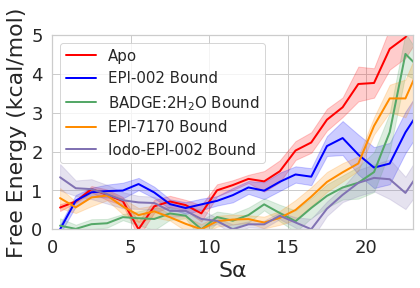

In [6]:
# SA_dG_1d:
file = 'Sa.bound.dG.dat'
Rg_apo = np.loadtxt(apodir+'Sa_dg.dat')
Rg_E2 = np.loadtxt(E2dir+'Sa.bound.dG.dat')
Rg_B = np.loadtxt(Bdir+'Sa.bound.dG.dat')
Rg_E7 = np.loadtxt(E7dir+'Sa.bound.dG.dat')
Rg_IE = np.loadtxt(IEdir+'Sa.bound.dG.dat')

plt.clf()
plt.plot(Rg_apo[:, 0], Rg_apo[:, 1], c='red', label='Apo', linewidth=2)
plt.plot(Rg_E2[:, 0], Rg_E2[:, 1], c='blue',
         label='EPI-002 Bound', linewidth=2)
plt.plot(Rg_B[:, 0], Rg_B[:, 1], c='C2',
         label='BADGE:2H$_2$O Bound', linewidth=2)
plt.plot(Rg_E7[:, 0], Rg_E7[:, 1], c='darkorange',
         label='EPI-7170 Bound', linewidth=2)
plt.plot(Rg_IE[:, 0], Rg_IE[:, 1], c='C4',
         label='Iodo-EPI-002 Bound', linewidth=2)


plt.fill_between(Rg_apo[:, 0], Rg_apo[:, 1]-Rg_apo[:, 2],
                 Rg_apo[:, 1]+Rg_apo[:, 2], color='red', alpha=0.2)
plt.fill_between(Rg_E2[:, 0], Rg_E2[:, 1]-Rg_E2[:, 2],
                 Rg_E2[:, 1]+Rg_E2[:, 2], color='blue', alpha=0.2)
plt.fill_between(Rg_B[:, 0], Rg_B[:, 1]-Rg_B[:, 2],
                 Rg_B[:, 1]+Rg_B[:, 2], color='C2', alpha=0.2)
plt.fill_between(Rg_E7[:, 0], Rg_E7[:, 1]-Rg_E7[:, 2],
                 Rg_E7[:, 1]+Rg_E7[:, 2], color='darkorange', alpha=0.2)
plt.fill_between(Rg_IE[:, 0], Rg_IE[:, 1]-Rg_IE[:, 2],
                 Rg_IE[:, 1]+Rg_IE[:, 2], color='C4', alpha=0.2)
plt.legend()

plt.ylim(0, 5)
plt.xlim(0, 23)
plt.xlabel('Sα', size=22)
plt.ylabel('Free Energy (kcal/mol)', size=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='upper left', fontsize=15)

plt.savefig('%s/Sa.dG.compare.apo.E2.B.E7.IE.pdf' % outdir)
plt.savefig('%s/Sa.dG.compare.apo.E2.B.E7.IE.png' % outdir)


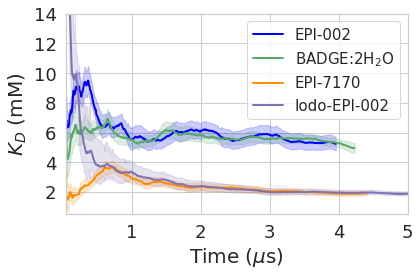

In [7]:
# Kd:
file = 'KD.timecourse.errors.dat'
Rg_E2 = np.loadtxt(E2dir+file)
Rg_B = np.loadtxt(Bdir+file)
Rg_E7 = np.loadtxt(E7dir+file)
Rg_IE = np.loadtxt(IEdir+file)

plt.clf()

plt.plot(Rg_E2[:, 0], Rg_E2[:, 1], c='blue',
         label='EPI-002', linewidth=2)
plt.plot(Rg_B[:, 0], Rg_B[:, 1], c='C2',
         label='BADGE:2H$_2$O', linewidth=2)
plt.plot(Rg_E7[:, 0], Rg_E7[:, 1], c='darkorange',
         label='EPI-7170', linewidth=2)
plt.plot(Rg_IE[:, 0], Rg_IE[:, 1], c='C4',
         label='Iodo-EPI-002', linewidth=2)


plt.fill_between(Rg_E2[:, 0], Rg_E2[:, 2], Rg_E2[:, 3], color='blue', alpha=0.2)
plt.fill_between(Rg_B[:, 0], Rg_B[:, 2], Rg_B[:, 3], color='C2', alpha=0.2)
plt.fill_between(Rg_E7[:, 0], Rg_E7[:, 2], Rg_E7[:, 3], color='darkorange', alpha=0.2)
plt.fill_between(Rg_IE[:, 0], Rg_IE[:, 2], Rg_IE[:, 3], color='C4', alpha=0.2)
plt.legend()

plt.xlim(0.05, 5)
plt.ylim(0.5, 14)
plt.xlabel('Time ($\mu$s)', fontsize=20)
plt.ylabel('$K_D$ (mM)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=15)

plt.savefig('%s/Kd.compare.E2.B.E7.IE.pdf' % outdir)
plt.savefig('%s/Kd.compare.E2.B.E7.IE.png' % outdir)


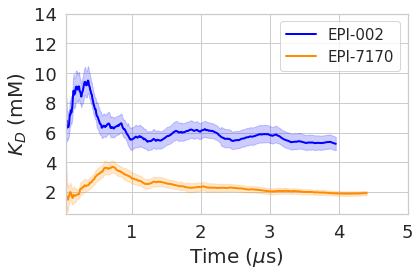

In [8]:
# Kd:
file = 'KD.timecourse.errors.dat'
Rg_E2 = np.loadtxt(E2dir+file)
Rg_B = np.loadtxt(Bdir+file)
Rg_E7 = np.loadtxt(E7dir+file)
Rg_IE = np.loadtxt(IEdir+file)

plt.clf()

plt.plot(Rg_E2[:, 0], Rg_E2[:, 1], c='blue',
         label='EPI-002', linewidth=2)
plt.plot(Rg_E7[:, 0], Rg_E7[:, 1], c='darkorange',
         label='EPI-7170', linewidth=2)



plt.fill_between(Rg_E2[:, 0], Rg_E2[:, 2], Rg_E2[:, 3], color='blue', alpha=0.2)
plt.fill_between(Rg_E7[:, 0], Rg_E7[:, 2], Rg_E7[:, 3], color='darkorange', alpha=0.2)
plt.legend()

plt.xlim(0.05, 5)
plt.ylim(0.5, 14)
plt.xlabel('Time ($\mu$s)', fontsize=20)
plt.ylabel('$K_D$ (mM)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=15)

plt.savefig('%s/Kd.compare.E2.E7.pdf' % outdir)
plt.savefig('%s/Kd.compare.E2.E7.png' % outdir)


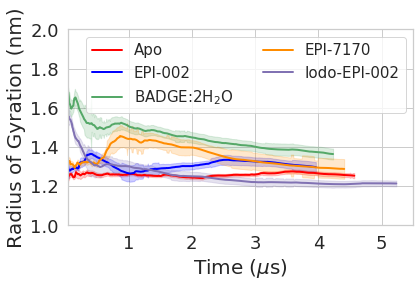

In [9]:
# rg:
file = 'rg.be.dat'
Rg_apo = np.loadtxt(apodir+file)
Rg_E2 = np.loadtxt(E2dir+file)
Rg_B = np.loadtxt(Bdir+file)
Rg_E7 = np.loadtxt(E7dir+file)
Rg_IE = np.loadtxt(IEdir+file)

plt.plot(Rg_apo[:,0], Rg_apo[:,1], c='red',
         label='Apo', linewidth=2)
plt.plot(Rg_E2[:,0], Rg_E2[:,1], c='blue',
         label='EPI-002', linewidth=2)
plt.plot(Rg_B[:,0], Rg_B[:,1], c='C2',
         label='BADGE:2H$_2$O', linewidth=2)
plt.plot(Rg_E7[:,0], Rg_E7[:,1], c='darkorange',
         label='EPI-7170', linewidth=2)
plt.plot(Rg_IE[:,0], Rg_IE[:,1], c='C4',
         label='Iodo-EPI-002', linewidth=2)

plt.fill_between(Rg_apo[:, 0], Rg_apo[:, 2], Rg_apo[:, 3], color='red', alpha=0.2)
plt.fill_between(Rg_E2[:, 0], Rg_E2[:, 2], Rg_E2[:, 3], color='blue', alpha=0.2)
plt.fill_between(Rg_B[:, 0], Rg_B[:, 2], Rg_B[:, 3], color='C2', alpha=0.2)
plt.fill_between(Rg_E7[:, 0], Rg_E7[:, 2], Rg_E7[:, 3], color='darkorange', alpha=0.2)
plt.fill_between(Rg_IE[:, 0], Rg_IE[:, 2], Rg_IE[:, 3], color='C4', alpha=0.2)

plt.xlim(0.05, 5.5)
plt.ylim(1.0, 2.0)
plt.xlabel('Time ($\mu$s)', fontsize=20)
plt.ylabel('Radius of Gyration (nm)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=15, ncol= 2)

plt.savefig('%s/rg.be.compare.E2.B.E7.IE.pdf' % outdir)
plt.savefig('%s/rg.be.compare.E2.B.E7.IE.png' % outdir)


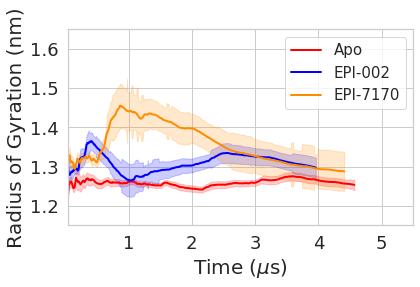

In [10]:
# rg:
file = 'rg.be.dat'
Rg_apo = np.loadtxt(apodir+file)
Rg_E2 = np.loadtxt(E2dir+file)
Rg_B = np.loadtxt(Bdir+file)
Rg_E7 = np.loadtxt(E7dir+file)
Rg_IE = np.loadtxt(IEdir+file)

plt.plot(Rg_apo[:,0], Rg_apo[:,1], c='red',
         label='Apo', linewidth=2)
plt.plot(Rg_E2[:,0], Rg_E2[:,1], c='blue',
         label='EPI-002', linewidth=2)

plt.plot(Rg_E7[:,0], Rg_E7[:,1], c='darkorange',
         label='EPI-7170', linewidth=2)


plt.fill_between(Rg_apo[:, 0], Rg_apo[:, 2], Rg_apo[:, 3], color='red', alpha=0.2)
plt.fill_between(Rg_E2[:, 0], Rg_E2[:, 2], Rg_E2[:, 3], color='blue', alpha=0.2)
plt.fill_between(Rg_E7[:, 0], Rg_E7[:, 2], Rg_E7[:, 3], color='darkorange', alpha=0.2)

plt.xlim(0.05, 5.5)
plt.ylim(1.15, 1.65)
plt.xlabel('Time ($\mu$s)', fontsize=20)
plt.ylabel('Radius of Gyration (nm)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=15)

plt.savefig('%s/rg.be.compare.E2.E7.pdf' % outdir)
plt.savefig('%s/rg.be.compare.E2.E7.png' % outdir)


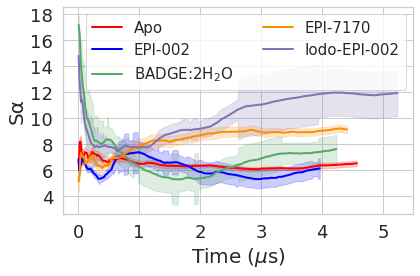

In [11]:
# rg:
file = 'Sa.be.dat'
Rg_apo = np.loadtxt(apodir+file)
Rg_E2 = np.loadtxt(E2dir+file)
Rg_B = np.loadtxt(Bdir+file)
Rg_E7 = np.loadtxt(E7dir+file)
Rg_IE = np.loadtxt(IEdir+file)

plt.plot(Rg_apo[:,0], Rg_apo[:,1], c='red',
         label='Apo', linewidth=2)
plt.plot(Rg_E2[:,0], Rg_E2[:,1], c='blue',
         label='EPI-002', linewidth=2)
plt.plot(Rg_B[:,0], Rg_B[:,1], c='C2',
         label='BADGE:2H$_2$O', linewidth=2)
plt.plot(Rg_E7[:,0], Rg_E7[:,1], c='darkorange',
         label='EPI-7170', linewidth=2)
plt.plot(Rg_IE[:,0], Rg_IE[:,1], c='C4',
         label='Iodo-EPI-002', linewidth=2)

plt.fill_between(Rg_apo[:, 0], Rg_apo[:, 2], Rg_apo[:, 3], color='red', alpha=0.2)
plt.fill_between(Rg_E2[:, 0], Rg_E2[:, 2], Rg_E2[:, 3], color='blue', alpha=0.2)
plt.fill_between(Rg_B[:, 0], Rg_B[:, 2], Rg_B[:, 3], color='C2', alpha=0.2)
plt.fill_between(Rg_E7[:, 0], Rg_E7[:, 2], Rg_E7[:, 3], color='darkorange', alpha=0.2)
plt.fill_between(Rg_IE[:, 0], Rg_IE[:, 2], Rg_IE[:, 3], color='C4', alpha=0.2)

# plt.xlim(0.05, 5.5)
# plt.ylim(1.0, 2.0)
plt.xlabel('Time ($\mu$s)', fontsize=20)
plt.ylabel('Sα', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=15, ncol= 2)

plt.savefig('%s/Sa.be.compare.E2.B.E7.IE.pdf' % outdir)
plt.savefig('%s/Sa.be.compare.E2.B.E7.IE.png' % outdir)


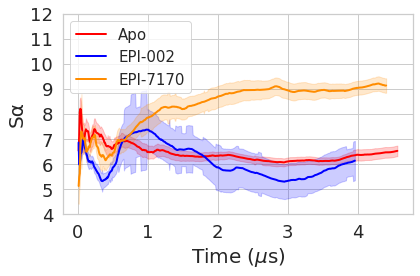

In [12]:
# rg:
file = 'Sa.be.dat'
Rg_apo = np.loadtxt(apodir+file)
Rg_E2 = np.loadtxt(E2dir+file)
Rg_B = np.loadtxt(Bdir+file)
Rg_E7 = np.loadtxt(E7dir+file)
Rg_IE = np.loadtxt(IEdir+file)

plt.plot(Rg_apo[:,0], Rg_apo[:,1], c='red',
         label='Apo', linewidth=2)
plt.plot(Rg_E2[:,0], Rg_E2[:,1], c='blue',
         label='EPI-002', linewidth=2)

plt.plot(Rg_E7[:,0], Rg_E7[:,1], c='darkorange',
         label='EPI-7170', linewidth=2)


plt.fill_between(Rg_apo[:, 0], Rg_apo[:, 2], Rg_apo[:, 3], color='red', alpha=0.2)
plt.fill_between(Rg_E2[:, 0], Rg_E2[:, 2], Rg_E2[:, 3], color='blue', alpha=0.2)
plt.fill_between(Rg_E7[:, 0], Rg_E7[:, 2], Rg_E7[:, 3], color='darkorange', alpha=0.2)

# plt.xlim(0.05, 5.5)
plt.ylim(4.0, 12.0)
plt.xlabel('Time ($\mu$s)', fontsize=20)
plt.ylabel('Sα', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='upper left', fontsize=15)

plt.savefig('%s/Sa.be.compare.E2.E7.pdf' % outdir)
plt.savefig('%s/Sa.be.compare.E2.E7.png' % outdir)


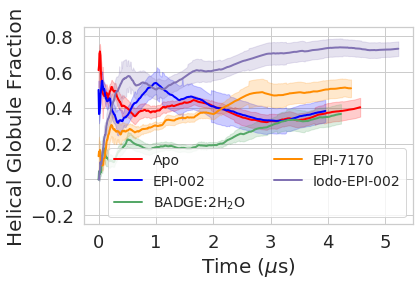

In [13]:
# gf:
file = 'glob.frac.be.dat'
Helix_apo = np.loadtxt(apodir+file)
Helix_E2_bound = np.loadtxt(E2dir+file)
Helix_B_bound = np.loadtxt(Bdir+file)
Helix_E7_bound = np.loadtxt(E7dir+file)
Helix_IE_bound = np.loadtxt(IEdir+file)

Apo_u = Helix_apo[:,0]+Helix_apo[:, 1]
Apo_l = Helix_apo[:,0]-Helix_apo[:, 1]
E2_u = Helix_E2_bound[:, 0]+Helix_E2_bound[:, 1]
E2_l = Helix_E2_bound[:, 0]-Helix_E2_bound[:, 1]
B_u = Helix_B_bound[:, 0]+Helix_B_bound[:, 1]
B_l = Helix_B_bound[:, 0]-Helix_B_bound[:, 1]
E7_u = Helix_E7_bound[:, 0]+Helix_E7_bound[:, 1]
E7_l = Helix_E7_bound[:, 0]-Helix_E7_bound[:, 1]
IE_u = Helix_IE_bound[:, 0]+Helix_IE_bound[:, 1]
IE_l = Helix_IE_bound[:, 0]-Helix_IE_bound[:, 1]


sns.lineplot(x=np.array(range(0, len(Helix_apo[:, 0])))*80/10000, y=Helix_apo[:, 0],
             color='red', label='Apo', linewidth=2)
sns.lineplot(x=np.array(range(0, len(Helix_E2_bound[:, 0])))*80/10000, y=Helix_E2_bound[:, 0],
             color='blue', label='EPI-002', linewidth=2)
sns.lineplot(x=np.array(range(0, len(Helix_B_bound[:, 0])))*80/10000, y=Helix_B_bound[:, 0],
             color='C2', label='BADGE:2H$_2$O', linewidth=2)
sns.lineplot(x=np.array(range(0, len(Helix_E7_bound[:, 0])))*80/10000, y=Helix_E7_bound[:, 0],
             color='darkorange', label='EPI-7170', linewidth=2)
sns.lineplot(x=np.array(range(0, len(Helix_IE_bound[:, 0])))*80/10000, y=Helix_IE_bound[:, 0],
             color='C4', label='Iodo-EPI-002', linewidth=2)

plt.fill_between(np.array(range(0, len(Helix_apo[:, 0])))*80/10000, Apo_u, Apo_l, color='red', alpha=0.2)
plt.fill_between(np.array(range(0, len(Helix_E2_bound[:, 0])))*80/10000, E2_u, E2_l, color='blue', alpha=0.2)
plt.fill_between(np.array(range(0, len(Helix_B_bound[:, 0])))*80/10000, B_u,
                 B_l, color='C2', alpha=0.2)
plt.fill_between(np.array(range(0, len(Helix_E7_bound[:, 0])))*80/10000, E7_u, E7_l, color='darkorange', alpha=0.2)
plt.fill_between(np.array(range(0, len(Helix_IE_bound[:, 0])))*80/10000, IE_u,
                 IE_l, color='C4', alpha=0.2)



# plt.xlim(0.05, 5.5)
plt.ylim(-0.25, 0.85)
plt.xlabel('Time ($\mu$s)', fontsize=20)
plt.ylabel('Helical Globule Fraction', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='lower right', fontsize=14, ncol = 2)

plt.savefig('%s/gf.compare.E2.B.E7.IE.pdf' % outdir)
plt.savefig('%s/gf.compare.E2.B.E7.IE.png' % outdir)

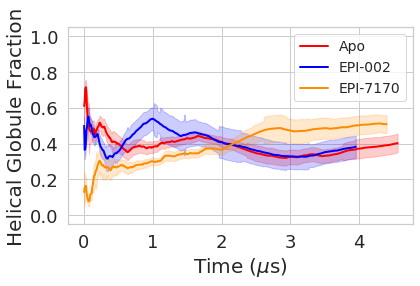

In [14]:
# gf:
file = 'glob.frac.be.dat'
Helix_apo = np.loadtxt(apodir+file)
Helix_E2_bound = np.loadtxt(E2dir+file)
Helix_B_bound = np.loadtxt(Bdir+file)
Helix_E7_bound = np.loadtxt(E7dir+file)
Helix_IE_bound = np.loadtxt(IEdir+file)

Apo_u = Helix_apo[:,0]+Helix_apo[:, 1]
Apo_l = Helix_apo[:,0]-Helix_apo[:, 1]
E2_u = Helix_E2_bound[:, 0]+Helix_E2_bound[:, 1]
E2_l = Helix_E2_bound[:, 0]-Helix_E2_bound[:, 1]
B_u = Helix_B_bound[:, 0]+Helix_B_bound[:, 1]
B_l = Helix_B_bound[:, 0]-Helix_B_bound[:, 1]
E7_u = Helix_E7_bound[:, 0]+Helix_E7_bound[:, 1]
E7_l = Helix_E7_bound[:, 0]-Helix_E7_bound[:, 1]
IE_u = Helix_IE_bound[:, 0]+Helix_IE_bound[:, 1]
IE_l = Helix_IE_bound[:, 0]-Helix_IE_bound[:, 1]


sns.lineplot(x=np.array(range(0, len(Helix_apo[:, 0])))*80/10000, y=Helix_apo[:, 0],
             color='red', label='Apo', linewidth=2)
sns.lineplot(x=np.array(range(0, len(Helix_E2_bound[:, 0])))*80/10000, y=Helix_E2_bound[:, 0],
             color='blue', label='EPI-002', linewidth=2)

sns.lineplot(x=np.array(range(0, len(Helix_E7_bound[:, 0])))*80/10000, y=Helix_E7_bound[:, 0],
             color='darkorange', label='EPI-7170', linewidth=2)


plt.fill_between(np.array(range(0, len(Helix_apo[:, 0])))*80/10000, Apo_u, Apo_l, color='red', alpha=0.2)
plt.fill_between(np.array(range(0, len(Helix_E2_bound[:, 0])))*80/10000, E2_u, E2_l, color='blue', alpha=0.2)

plt.fill_between(np.array(range(0, len(Helix_E7_bound[:, 0])))*80/10000, E7_u, E7_l, color='darkorange', alpha=0.2)




# plt.xlim(0.05, 5.5)
plt.ylim(-0.05, 1.05)
plt.xlabel('Time ($\mu$s)', fontsize=20)
plt.ylabel('Helical Globule Fraction', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)

plt.savefig('%s/gf.compare.E2.E7.pdf' % outdir)
plt.savefig('%s/gf.compare.E2.E7.png' % outdir)